## Importing libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [42]:
salary=pd.read_csv("D:\\machine learning\\course\\regression\\support vector regression\\Position_Salaries.csv")

In [43]:
x=salary.iloc[:,1:-1].values
y=salary.iloc[:,-1].values

In [44]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [45]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


#### changing y to 2d array for feature scaling because fit transform method needs 2d array as input for scaling

In [46]:
y=y.reshape(len(y),1)

In [47]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling
#### here we scaling both feature matrix x and label y

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

In [49]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [50]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training our Support vector regression model
#### here we are using gaussian rbf kernel for training our svr model

In [51]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [52]:
sc_y.inverse_transform(regressor.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualizing our support vector regression model

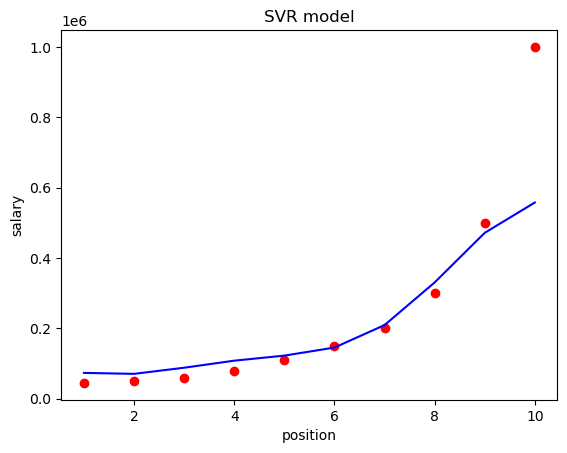

In [53]:
plt.scatter(sc.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('SVR model')
plt.xlabel("position")
plt.ylabel('salary')
plt.show()

## Visualing our support vector regression model but with more smoother best fit line

C:\Users\coolv\AppData\Local\Temp\ipykernel_3912\3991037933.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc.inverse_transform(x)), max(sc.inverse_transform(x)), 0.1)


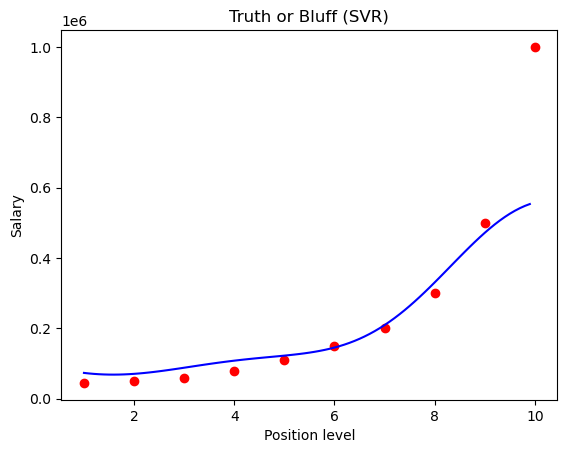

In [58]:
X_grid = np.arange(min(sc.inverse_transform(x)), max(sc.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc.inverse_transform(x), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()